# Airbnb Data Analysis

##### The following report is going to discuss the following questions:

1- Which property type is the most popular in Boston and Seattle?

2- What is the average earnings of Airbnb from the activity in both cities per day?

3- Can we predict the daily price of a property based on some of it's properties?

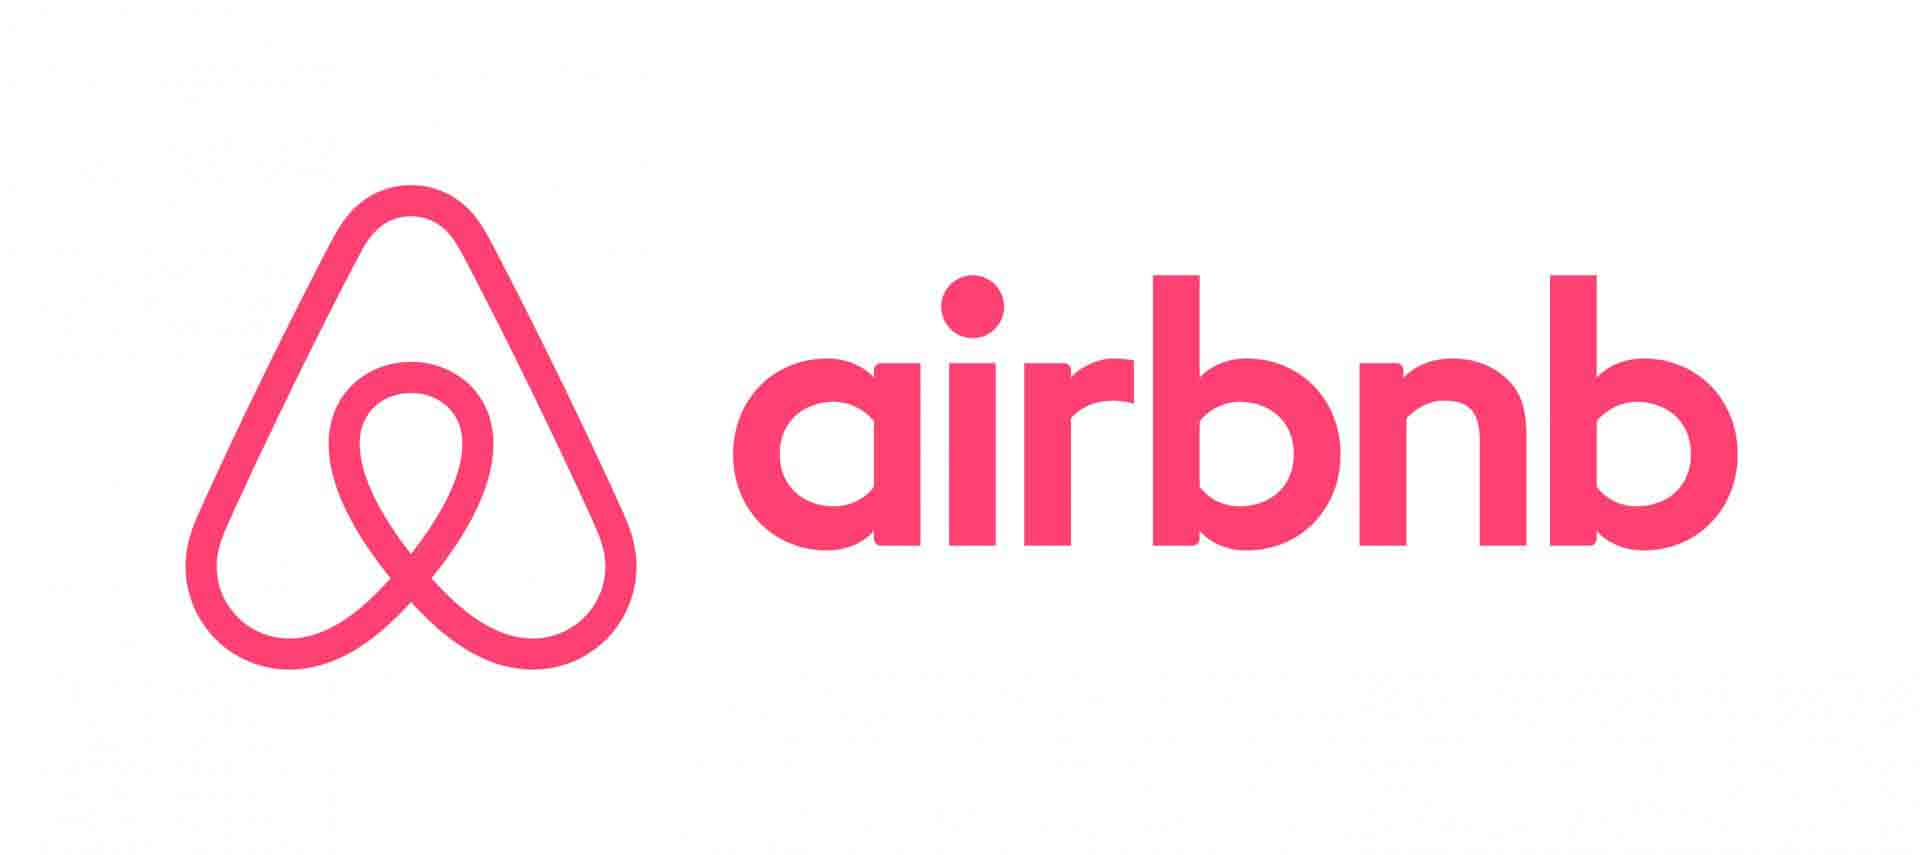

In [51]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
import numpy as np
%matplotlib inline
warnings.filterwarnings("ignore")

In [52]:
# First we read the data

df = pd.read_csv("boston.csv")
df2 = pd.read_csv("seattle.csv")

In [53]:
# Now to answer the first question we need all the rows with the city boston

boston_only = df[(df["city"] == "Boston") | (df["city"] == "boston")]

In [54]:
# We then group them by property type

boston_popular = boston_only.groupby("property_type").count()["id"]
boston_results = pd.DataFrame(boston_popular)
boston_results

,id
property_type,
Apartment,2501
Bed & Breakfast,36
Boat,12
Condominium,224
Dorm,2
Entire Floor,3
Guesthouse,1
House,495
Loft,35


Text(0.5,1,'Property types in Boston')

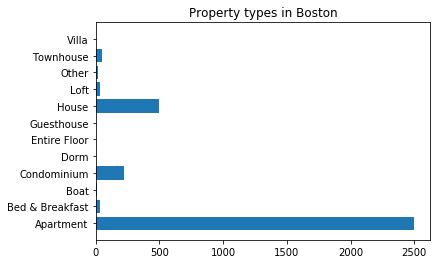

In [55]:
# We plot a bar graph to visualize the result

plt.barh(boston_result.index.tolist(), boston_result["id"])
plt.title("Property types in Boston")

#### As we can clearly see, apartments are the most common in Boston

Now to analyze Airbnb earnings in both cities

In [56]:
# We first create a dataframe for only the rows with the city seattle
seattle_only = df2[(df2["city"] == "Seattle") | (df2["city"] == "Seattle ")]

# We define a function which will clear the prices data

def clean_prices(col):
    col2 = col.str.strip("$")
    col2 = col2.str.replace(",", "")
    col2 = col2.astype("float64")
    return col2


# We apply the function
boston_only["price"] = clean_prices(boston_only["price"])
seattle_only["price"] = clean_prices(seattle_only["price"])

# Calculatiin the total earnings
boston_earning = boston_only["price"].sum()
seattle_earning = seattle_only["price"].sum()
total_earnings = boston_earning + seattle_earning
total_earnings

1085848.0

#### As we can see Airbnb's earnings are approximately 1 Million dollar per day 

### Prices Modeling

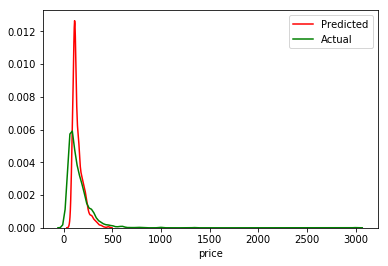

In [57]:
df["price"] = clean_prices(df["price"])
df2["price"] = clean_prices(df2["price"])

boston = df[["accommodates", "bathrooms", "bedrooms", "beds", "price"]]
seattle = df2[["accommodates", "bathrooms", "bedrooms", "beds", "price"]]

data = pd.concat([boston, seattle], axis=0)
data.reset_index(inplace=True)
data.drop("index", axis=1, inplace=True)

x = data[["accommodates", "bathrooms", "bedrooms", "beds"]]
y = data["price"]

x.replace([np.inf, -np.inf], np.nan, inplace=True)
y.replace([np.inf, -np.inf], np.nan, inplace=True)
x["bathrooms"].replace(np.nan, x["bathrooms"].mode()[0], inplace=True)
x["bedrooms"].replace(np.nan, x["bedrooms"].mode()[0], inplace=True)
x["beds"].replace(np.nan, x["beds"].mode()[0], inplace=True)




x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=69, test_size=0.2)

regressor = LinearRegression()
regressor.fit(x_train, y_train)
prediction = regressor.predict(x_test)
ax = sns.distplot(prediction, label="Predicted", hist=False, color="r")
sns.distplot(y_test, label="Actual", hist=False, color="g", ax=ax)